<a href="https://colab.research.google.com/github/isntit12/prac/blob/main/img_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 #이미지처리 라이브러리
import matplotlib.pyplot as plt  #데이터셋 시각화

import tensorflow_datasets as tfds #사용할 이미지를 가지고 오는 곳
import tensorflow as tf  #딥러닝 모델을 위해 필요한 라이브러리

In [ ]:
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)  #데이터 정보
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteIC54J5/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [ ]:
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)    #이미지 30개 불러오기

30

(-0.5, 349.5, 261.5, -0.5)

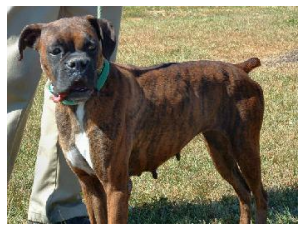

In [ ]:
plt.imshow(images[0])
plt.axis('off')  #불러온 이미지 확인

In [ ]:
resnet50_pre=tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224,224,3))
resnet50_pre.summary() #resnet 인공지능 모델 불러오기

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions #결과를 어떤 대상인지 바꿔주는 라이브러리

In [ ]:
def pred_img(img):  #예측 함수
  plt.imshow(img)  #이미지 먼저 보여줌
  plt.axis('off')
  plt.show()

  img_resized = cv2.resize(img, (224, 224)) #사이즈 고정
  pred = resnet50_pre.predict(img_resized.reshape([1, 224, 224,3]))  #예측
  decode_pred = decode_predictions(pred)    #예측 결과를 어떤 대상인지 알려준다

  for i, instance in enumerate(decode_pred[0]): 

    print('{}위: {} ({:.2f})%)'.format(i+1, instance[1], instance[2]*100)) #몇위, 대상이 무엇인지, 몇퍼센트의 확률로 계산 했는지 

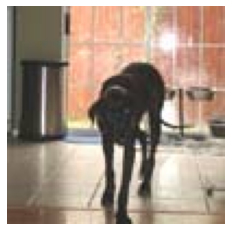

1위: Great_Dane (48.84)%)
2위: redbone (28.99)%)
3위: tusker (4.38)%)
4위: Weimaraner (3.46)%)
5위: bloodhound (2.59)%)


In [ ]:
pred_img(images[5])